In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [81]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [82]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)      #ID and ZIP isn't necessary for Data Analysis

In [83]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [84]:
import plotly.express as px

In [85]:
fig=px.box(df,y=['Age', 'Experience', 'Income', 'Family','Education'])
fig.show()

###### Here we can see that income has some higher skewness and Experience has some value in negative, which can't be

In [86]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [87]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>],
       [<AxesSubplot:title={'center':'CD Account'}>,
        <AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>]], dtype=object)

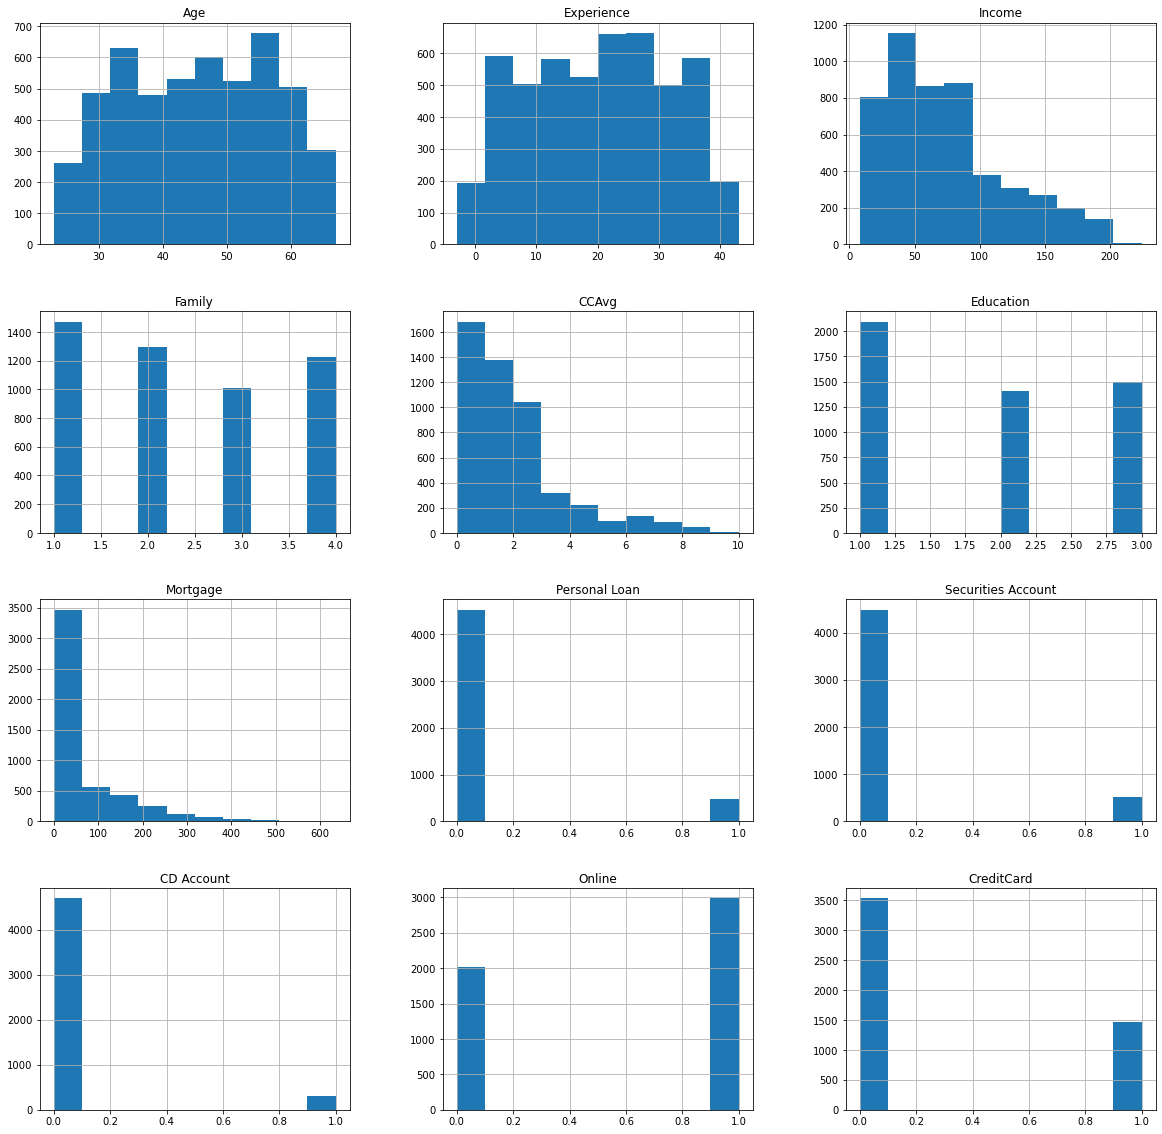

In [88]:
df.hist(figsize=(20,20))

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Experience', ylabel='Density'>

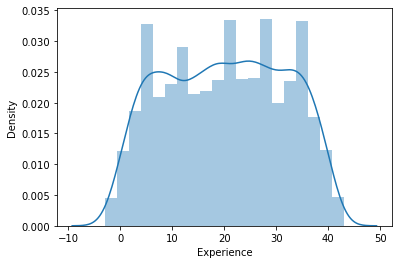

In [89]:
sns.distplot(df['Experience'])

###### Experience has some negative Value

In [90]:
df['Experience'].mean()

20.1046

In [91]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

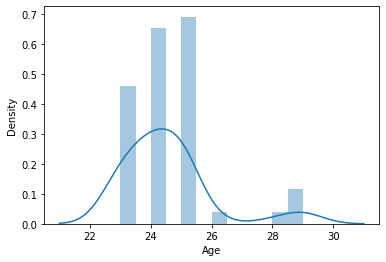

In [92]:
sns.distplot(negative_exp['Age'])

In [93]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [94]:
negative_exp.size

624

In [95]:
print('There are {} records which has negative values of experience,approx {} %'.format(negative_exp.size,(negative_exp.size/df.size)*100))

There are 624 records which has negative values of experience,approx 1.04 %


In [96]:
data=df.copy()
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [97]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


###### Negative Experience Problem was solved!!!

In [98]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.050089,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.013152,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

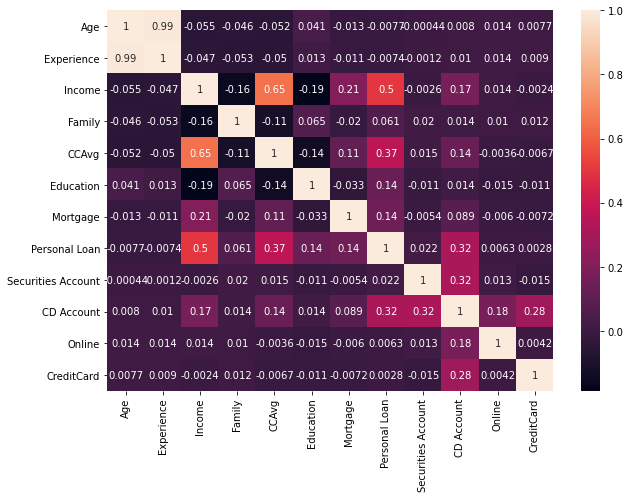

In [99]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

###### Age and Experience are highly correlated, we can drop anyone of them

In [100]:
data=data.drop(['Experience'],axis=1) 
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [101]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

###### 1= Under Graduate
###### 2= Graduate
###### 3= Professional

In [102]:
def mark(x):
    if x==1:
        return 'Under Graduate'
    elif x==2:
        return 'Graduate'
    elif x==3:
        return 'Professional'

In [104]:
data['edu_mark']=data['Education'].apply(mark)


In [106]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu_mark
0,25,49,4,1.6,1,0,0,1,0,0,0,Under Graduate
1,45,34,3,1.5,1,0,0,1,0,0,0,Under Graduate
2,39,11,1,1.0,1,0,0,0,0,0,0,Under Graduate
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate


In [110]:
EDU_dis=data.groupby('edu_mark')['Age'].count()        #On the basis of age - Count
EDU_dis

edu_mark
Graduate          1403
Professional      1501
Under Graduate    2096
Name: Age, dtype: int64

In [119]:
fig=px.pie(data,values=EDU_dis,names=EDU_dis.index,title='Customers Based on Education')
fig.show()

In [121]:
def security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return 'Holds Securities & Deposit'
    elif (row['Securities Account']==0) & (row['CD Account']==0):
        return "Doesn't Holds Securities & Deposit"
    elif (row['Securities Account']==1) & (row['CD Account']==0):
        return "Holds Only Securities"
    elif (row['Securities Account']==0) & (row['CD Account']==1):
        return "Holds Only Deposit"

In [123]:
data['Account_holder_category']=data.apply(security_CD,axis=1)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu_mark,Account_holder_category
0,25,49,4,1.6,1,0,0,1,0,0,0,Under Graduate,Holds Only Securities
1,45,34,3,1.5,1,0,0,1,0,0,0,Under Graduate,Holds Only Securities
2,39,11,1,1.0,1,0,0,0,0,0,0,Under Graduate,Doesn't Holds Securities & Deposit
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate,Doesn't Holds Securities & Deposit
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate,Doesn't Holds Securities & Deposit


In [125]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Doesn't Holds Securities & Deposit', 'Holds Only Securities',
       'Holds Only Deposit', 'Holds Securities & Deposit'],
      dtype='object')

In [127]:
fig=px.pie(data,values=values,names=values.index,title='Security And Deposit')
fig.show()

In [129]:
px.box(data,x='Education',y='Income')

In [131]:
px.box(data,x='Education',y='Income',facet_col='Personal Loan')

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



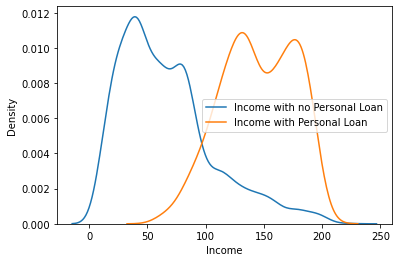

In [138]:
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no Personal Loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with Personal Loan')
plt.legend()

###### Higher Income People have Personal Loan

## AUTOMATE THE ANALYSIS

In [151]:
def plot(col1,col2,label1,label2,title):
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



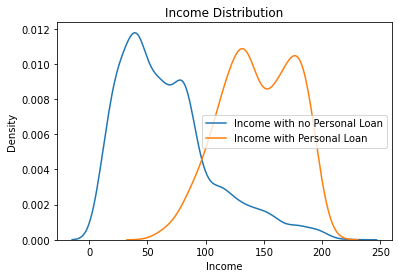

In [152]:
plot('Income','Personal Loan','Income with no Personal Loan','Income with Personal Loan','Income Distribution')

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



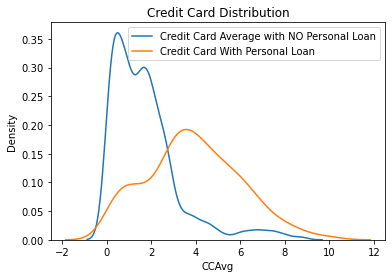

In [144]:
plot('CCAvg','Personal Loan','Credit Card Average with NO Personal Loan','Credit Card With Personal Loan','Credit Card Distribution')

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



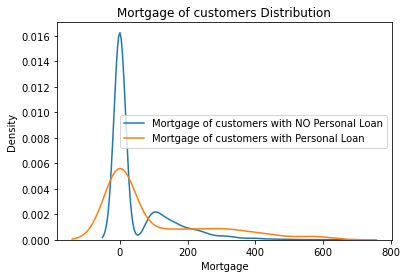

In [153]:
plot('Mortgage','Personal Loan','Mortgage of customers with NO Personal Loan','Mortgage of customers with Personal Loan','Mortgage of customers Distribution')

In [155]:
col_names=['Securities Account','Online','Account_holder_category','CreditCard']

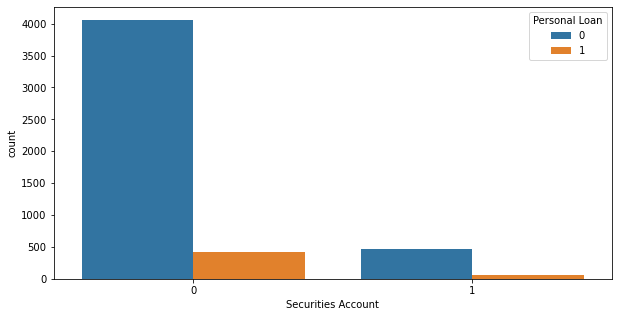

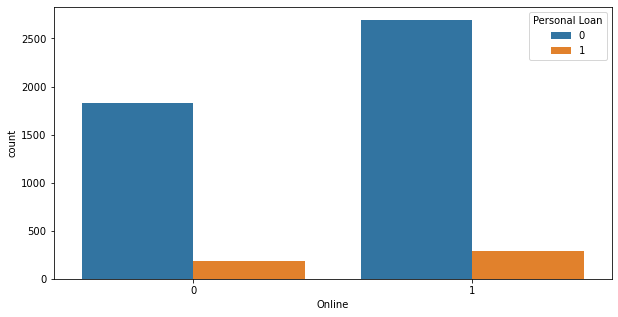

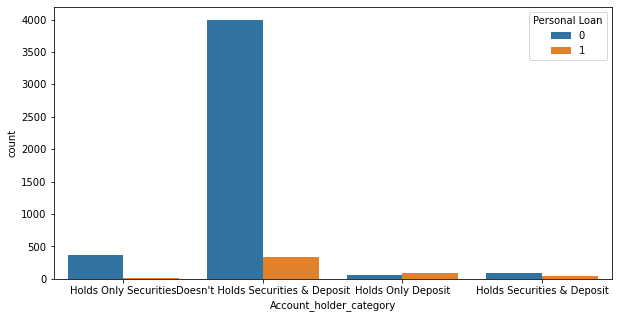

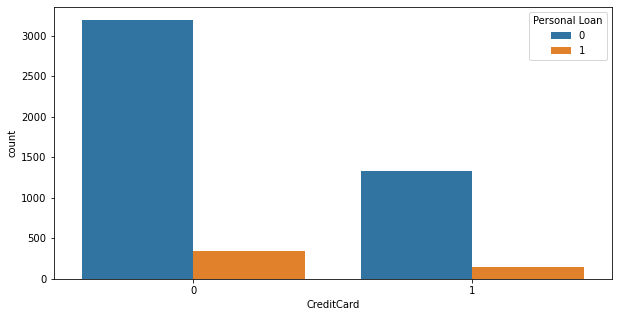

In [162]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',data=data)